In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [3]:
#importing the datset

df = pd.read_csv('D:\Churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#looping through the columns to get unique values per column

for i in df.columns:
    print(f"Unique {i}'s count : {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique customerID's count : 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count : 2
['Female' 'Male']

Unique SeniorCitizen's count : 2
[0 1]

Unique Partner's count : 2
['Yes' 'No']

Unique Dependents's count : 2
['No' 'Yes']

Unique tenure's count : 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count : 2
['No' 'Yes']

Unique MultipleLines's count : 3
['No phone service' 'No' 'Yes']

Unique InternetService's count : 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count : 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count : 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count : 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count : 3
['No' 'Yes' 'No internet service']

Unique 

In [8]:
#if you want to check separately each column example:-
print("Unique values in this column :-" ,df['InternetService'].unique())
print("Number of unique values :- " ,df['InternetService'].nunique())

Unique values in this column :- ['DSL' 'Fiber optic' 'No']
Number of unique values :-  3


#### As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

#### (1) Demographic Information

gender: Whether the client is a female or a male (Female, Male).
SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
Partner: Whether the client has a partner or not (Yes, No).
Dependents: Whether the client has dependents or not (Yes, No).

#### (2) Customer Account Information

tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
TotalCharges: The total amount charged to the customer (Multiple different numeric values).

#### (3) Services Information

PhoneService: Whether the client has a phone service or not (Yes, No).
MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

## EDA

In [9]:
# Transforming 'TotalCharges' into numeric data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [10]:
# as we can see that the 'TotalCharges' column has 11 missing values.
df['TotalCharges'].isna().sum()  # or we do this using isnull- df['TotalCharges'].isnull().sum()

11

In [11]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# as we can see here that 'tenure' is 0 in some rows but monthly charges are not null
# so we will drop these rows.

df.dropna(inplace = True)

In [13]:
# The customerID column is useless to explain whether not the customer will churn.
# Therefore, we drop this column from the data set.
df.drop(columns = 'customerID', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [15]:
# converting 'Tenure'into float

df['tenure'] = df['tenure'].astype(float)
df['tenure'].dtype

dtype('float64')

In [16]:
df.isna().sum() # no null data

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Hypothesis building- Assumptions

The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.

Customers are willing to cancel simple contracts with few associated product components quicker and more often than complexer product bundles.Attracting policies like They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).

Customers with spouses and children might churn less to keep the services running for their family.

Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers of churn.

More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.

Senior citizens tend to churn less due to the extended effort associated with terminating contracts.

#### Data Exploration and analysis

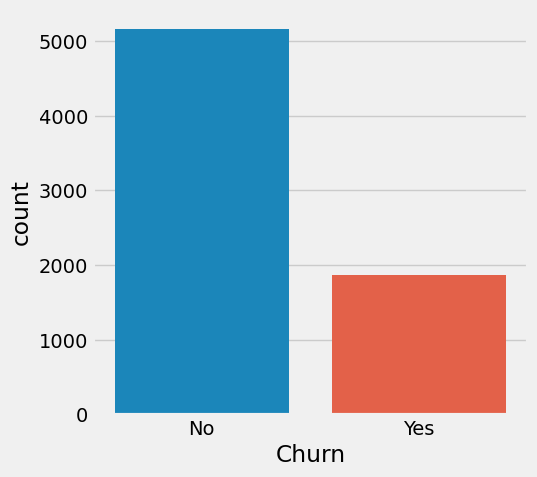

In [17]:
# Display a frequency distribution of churn
plt.style.use("fivethirtyeight")
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], linewidth=1)
plt.show()

In [18]:
df['Churn'].value_counts()/len(df)*100 # or we could have used -- df['Churn'].value_counts(normalize=True) * 100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

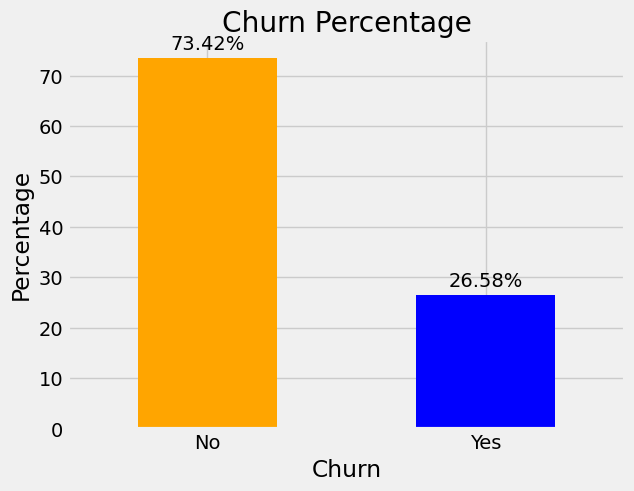

In [19]:
churn_perc_plot = df['Churn'].value_counts()/len(df)*100
ax = churn_perc_plot.plot.bar(rot = 0, color = ['orange','b'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentage')
ax.set_title('Churn Percentage')
plt.show()

In [20]:
# analysing Customer Account Information — Numerical variables
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Examining Customer Account Information — Continuous variables by churn
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

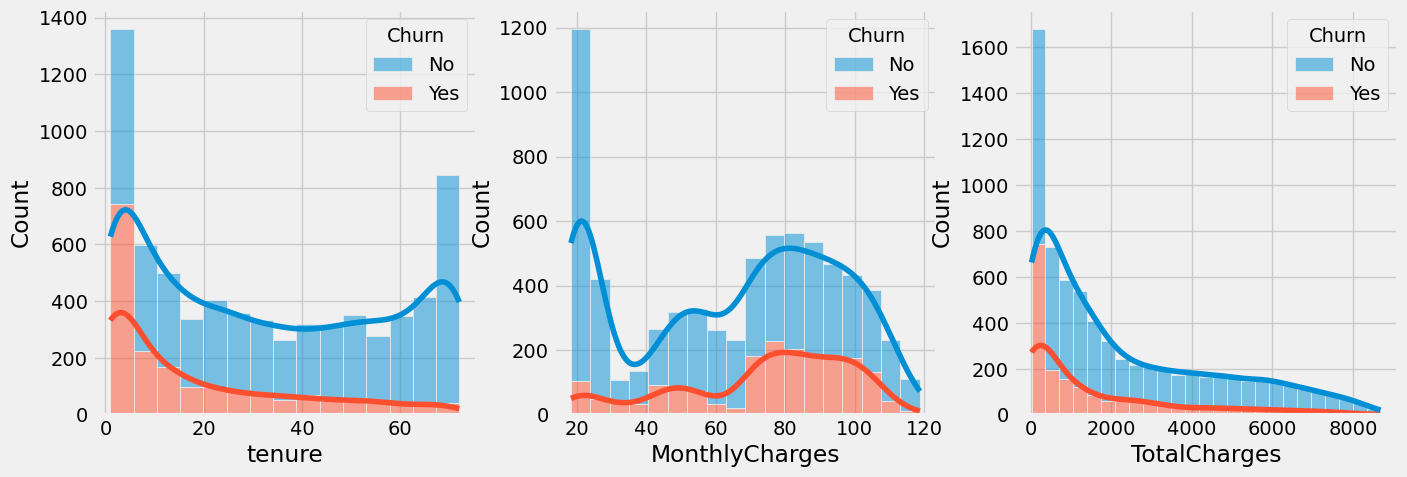

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=True, ax=axes[i])
    axes[i].set_xlabel(col)

plt.show()

#### Plot Insights we get :
1. The churn rate tends to be larger when monthly charges are high.
2. New customers (low tenure) are more likely to churn.
3. Clients with high total charges are less likely to leave the company.

In [23]:
# Examining the distrinution of Customer Account Information — Categorical variables by churn
# but before that remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

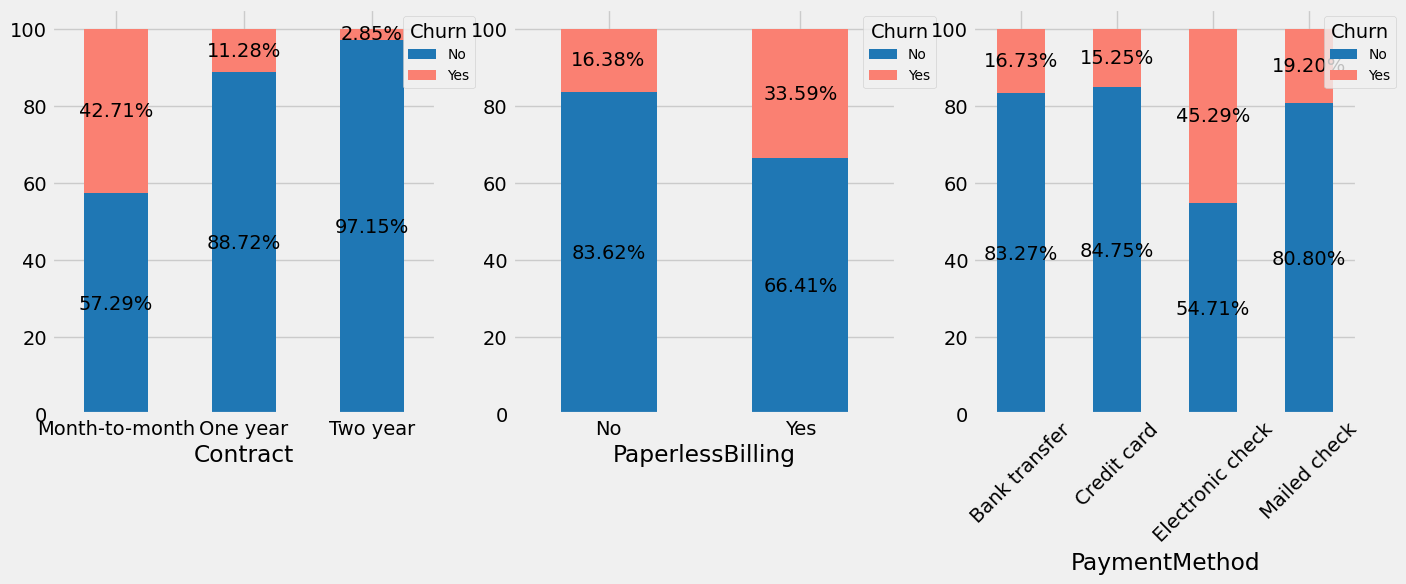

In [24]:
# plotting the distribution
Acc_info_cat = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(nrows=1, ncols=len(Acc_info_cat), figsize=(15, 5))

for i, col in enumerate(Acc_info_cat):
    prop_by_independent = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    ax = axes[i]
    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['tab:blue','salmon'])
    ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True, fontsize = 10)
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate('{:.2f}%'.format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.show()


#### Plot Insights we get :
1. Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
2. Customers subscribed to paperless billing churn more than those who are not subscribed.
3. Customers who opted for an electronic check as paying method are more likely to leave the company.

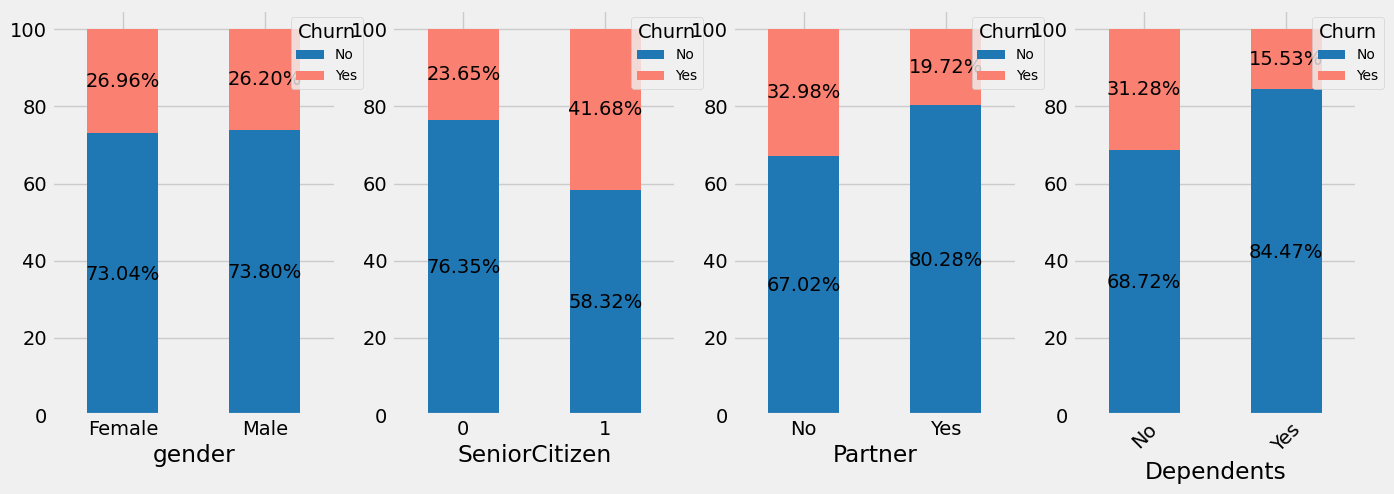

In [25]:
# Examining the distribution of demographic information
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=1, ncols=len(demo_cols), figsize=(15, 5))

for i, col in enumerate(demo_cols):
    demographic_prop = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    ax = axes[i]
    demographic_prop.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['tab:blue','salmon'])
    ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True, fontsize = 10)
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate('{:.2f}%'.format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.show()

Plot Insights we get :
1. The churn rates in both the gender are almost equal, so this column has no significant predictive power.
2. The churn rate of senior citizens is almost double that of young citizens.
3. Customers with a partner churn less than customers with no partner.
4. Customers with dependents churn less than customers with no dependents.

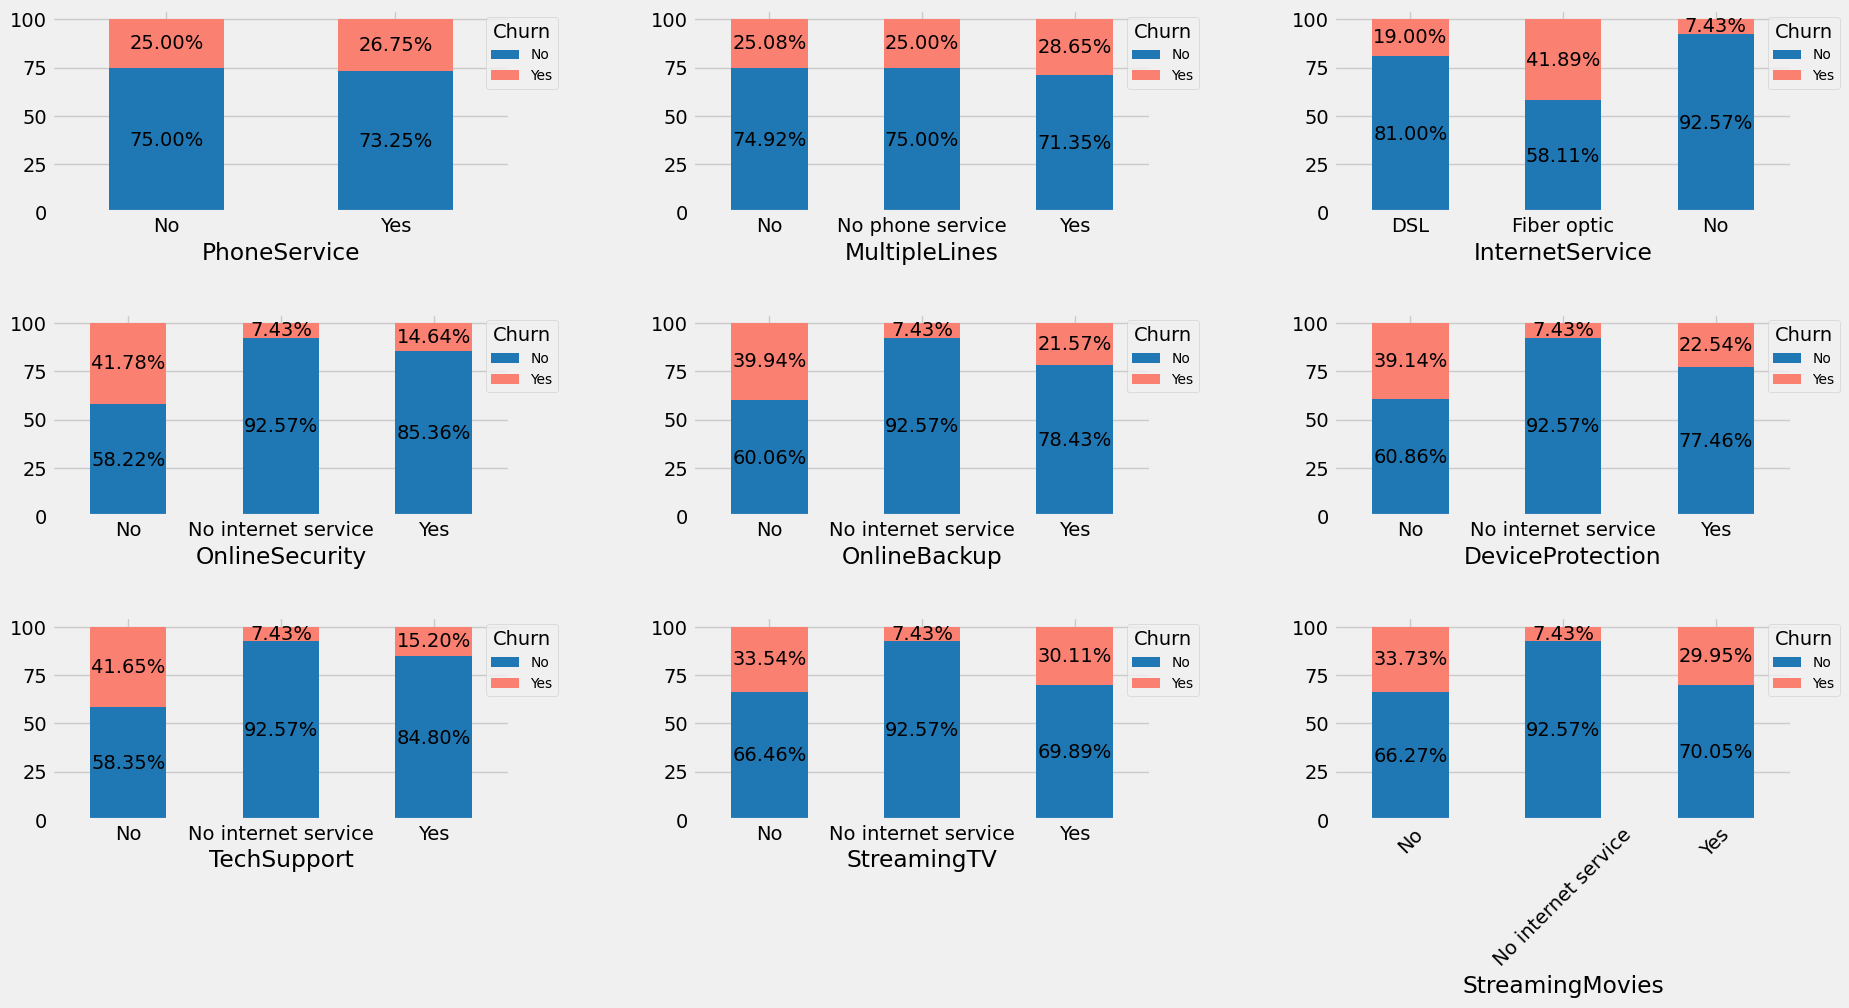

In [26]:
#Examining the the distribution of services info by churn
serv_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for i, col in enumerate(serv_cols):
    serv_prop = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
    ax = axes.flatten()[i]
    serv_prop.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['tab:blue','salmon'])
    ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True, fontsize = 10)
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate('{:.2f}%'.format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')

fig.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

#### Plot insights we get :
1. The percentage of churn for all classes in both independent variables 'PhoneService' and 'MultipleLines' is nearly the same.
2. Clients with online security churn less than those without it.
3. Customers with no tech support tend to churn more often than those with tech support.
4. Customers with InternetService fiber optic as part of their contract have much higher churn rate.

In [27]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [28]:
# check for outliers using IQR method
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 -Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers detected with IQR method - no adjustments made

## Feature Engineering

#### 1. Feature selection/ generation

In [29]:
# generating a new feature by summing up the number of add-on services taken by the consumer

df['Addition_services_num'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies','TechSupport',
                                   'StreamingTV','OnlineBackup']] == 'Yes').sum(axis=1)

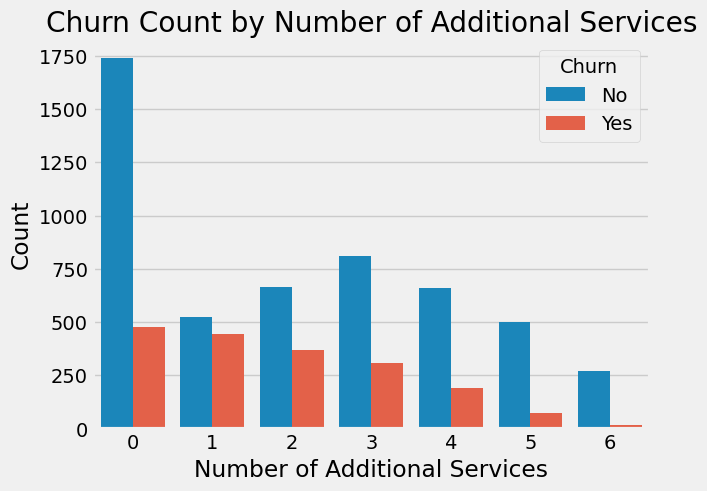

In [30]:
# generate countplot for the new feature
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.countplot(x='Addition_services_num', hue='Churn', data=df)

plt.xlabel('Number of Additional Services')
plt.ylabel('Count')
plt.title('Churn Count by Number of Additional Services')

plt.legend(title='Churn', loc='upper right')

plt.show()

#### Plot insights we get :
1. The countplot shows a very high churn rate for customers that have 1 or less than 1 additional service.
2. Customers with a very high number of additional services do have a low churn rate.

#### 2. Label Encoding

In [31]:
df1 = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df1[column] = df1[column].map({'Female': 1, 'Male': 0})
    else: 
        df1[column] = df1[column].map({'Yes': 1, 'No': 0})

#### 3.  One-Hot Encoding

In [32]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod','Addition_services_num']

# encode categorical variables with more than two levels using one-hot encoding
df1 = pd.get_dummies(df1, columns = one_hot_encoding_columns)

In [33]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Addition_services_num_0,Addition_services_num_1,Addition_services_num_2,Addition_services_num_3,Addition_services_num_4,Addition_services_num_5,Addition_services_num_6
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,0,0


In [34]:
# Separate the features (X) and target variable (y)
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [35]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize the logistic regression model
model = LogisticRegression()

In [37]:
# Fit the model on the training data
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [40]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[913 120]
 [176 198]]


In [42]:
# Calculate additional metrics (precision, recall, F1-score, support)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

